# NIR Notebook Test
01.OKt 2023

### Instructions
1. 

#### Serial

In [1]:
import serial
import serial.tools.list_ports
def list_serial_ports():
    ports = serial.tools.list_ports.comports()
    for port in ports:
        print(port)
if __name__ == '__main__':
    list_serial_ports()

COM3 - Standard Serial over Bluetooth link (COM3)
COM8 - USB Serial Device (COM8)
COM4 - Standard Serial over Bluetooth link (COM4)


In [8]:
import time
import schedule
carry_values = []
def main_func():
    global carry_values
    try:
        arduino = serial.Serial('COM8', 115200, timeout=1)
        print('Established serial connection to Arduino')
    except Exception as e:
        print(f'Failed to connect: {e}')
        return
    arduino_data = arduino.readline()
    if not arduino_data:
        print('No data received from Arduino. Exiting...')
        arduino.close()
        return 'exit'
    decoded_values = str(arduino_data[0:len(arduino_data)].decode("utf-8"))
    list_values = decoded_values.split(',')
    list_values= list_values[:-1]
    carry_values = []
    for item in list_values:
        carry_values.append(float(item))
    print(f'Collected readings from Arduino: {carry_values}')
    arduino_data = 0
    arduino.close()
    print('Connection closed')
    print('<----------------------------->')
print('Program started')
schedule.every(5).seconds.do(main_func)
start_time = time.time()
while True:
    result = schedule.run_pending()
    if result == 'exit':
        break
    time.sleep(1)
    elapsed_time = time.time() - start_time
    if elapsed_time > 15:
        print('graph')
        print(f'Graph: {carry_values}')
        break

Program started
Established serial connection to Arduino
No data received from Arduino. Exiting...
Established serial connection to Arduino
No data received from Arduino. Exiting...
Established serial connection to Arduino
Collected readings from Arduino: [865.63, 225.83, 515.96, 110.83, 251.91, 408.34, 61.65, 72.69, 353.64, 45.18, 103.05, 18.2, 34.48, 27.42, 71.75, 103.19, 41.67]
Connection closed
<----------------------------->
Established serial connection to Arduino
Collected readings from Arduino: [834.03, 209.36, 481.26, 101.6, 239.53, 400.2, 61.16, 70.28, 370.81, 44.35, 111.46, 19.01, 35.27, 29.08, 75.21, 112.36, 39.71]
Connection closed
<----------------------------->
Established serial connection to Arduino
Collected readings from Arduino: [873.11, 218.08, 503.18, 105.8, 248.26, 418.51, 58.22, 68.36, 368.52, 43.53, 110.41, 18.61, 36.83, 29.08, 77.81, 113.51, 42.32]
Connection closed
<----------------------------->
Established serial connection to Arduino
No data received from 

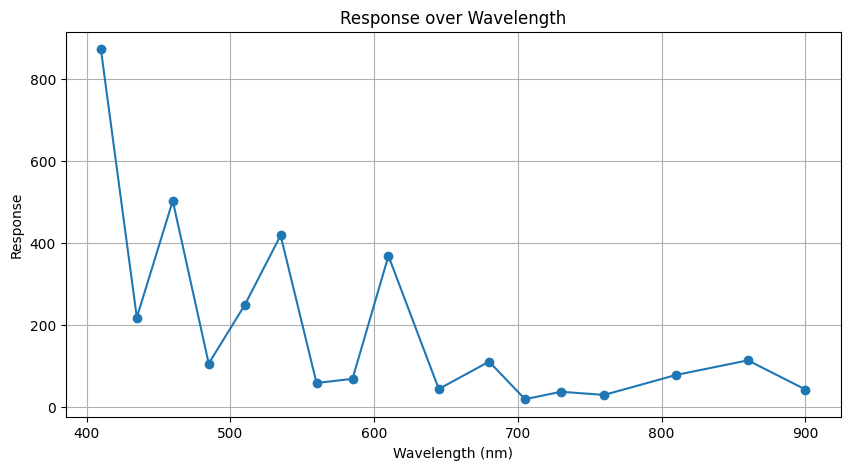

In [9]:
import matplotlib.pyplot as plt
#carry_values = [1021.96, 485.59, 1090.37, 413.11, 787.75, 1186.35, 437.41, 560.83, 2201.98, 416.03, 671.91, 134.69, 202.98, 146.25, 479.8, 950.51, 335.93]
x_values = [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900]
plt.figure(figsize=(10,5))
plt.plot(x_values, carry_values, marker='o')
plt.title('Response over Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Response')
plt.grid(True)
plt.show()

In [10]:
import csv
import os
filename = 'samples_01.csv'
item = input('Please add a new item at the end of the list (a text string): ')
carry_values.append(item)
file_exists = os.path.isfile(filename)
with open(filename, mode='a', newline='') as file:
    writer = csv.writer(file)
    if not file_exists:
        writer.writerow(['Response', 'Additional Item'])
    writer.writerow(carry_values + [item])
print(f'Data has been saved to {filename}')

Data has been saved to samples_01.csv


Skipping row due to length mismatch: x_values length: 17, carry_values length: 0


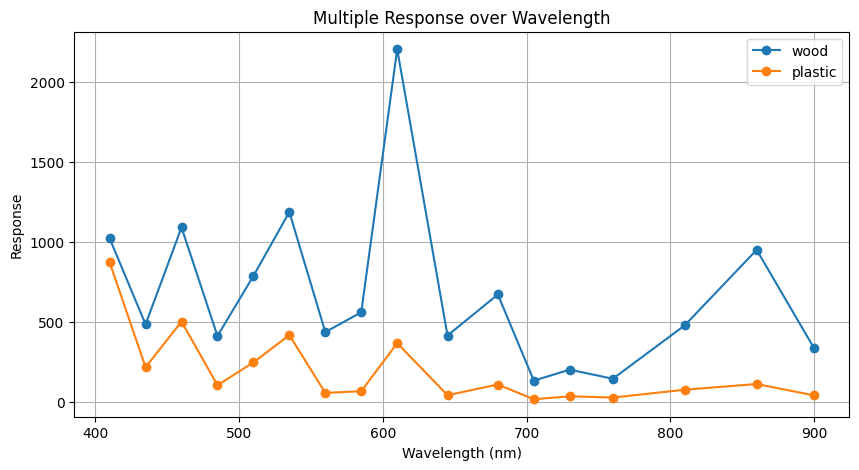

In [11]:
import csv
import os
import matplotlib.pyplot as plt
filename = 'samples_01.csv'
x_values = [410, 435, 460, 485, 510, 535, 560, 585, 610, 645, 680, 705, 730, 760, 810, 860, 900]
plt.figure(figsize=(10,5))
with open(filename, mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        try:
            carry_values = [float(value) for value in row[:-2]]  # Exclude the last two items
        except ValueError as e:
            print(f'Error converting value to float: {e}')
            continue  # Skip to the next row if there is an error converting value
        if len(x_values) != len(carry_values):
            print(f'Skipping row due to length mismatch: x_values length: {len(x_values)}, carry_values length: {len(carry_values)}')
            continue  # Skip to the next row if there is a length mismatch
        legend_item = row[-2]  # Use the second last item as legend
        plt.plot(x_values, carry_values, marker='o', label=legend_item)
plt.title('Multiple Response over Wavelength')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Response')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()